<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa3-Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
import sklearn
from sklearn import preprocessing
from sklearn import utils
import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

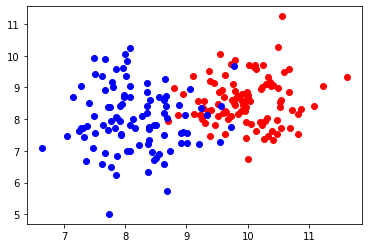

In [117]:
mu_a=10.0
sigma_a=0.5

a=np.random.normal(mu_a,sigma_a,size=100)
data_a=np.zeros(a.size)

for i in np.arange(0,a.size):
  data_a[i]=1/(sigma_a * np.sqrt(2 * np.pi)) *np.exp( - (a[i] - mu_a)**2 / (2 * sigma_a**2))

a_ajuste = np.linspace(7.5,12.5)
ajuste_gaussiano_a = 1/(sigma_a*np.sqrt(2*np.pi))*np.exp(-(a_ajuste-mu_a)**2/(2*sigma_a**2))

mu_b=8.5
sigma_b=0.75

b=np.random.normal(mu_b,sigma_b,size=100)
data_b=np.zeros(b.size)

for i in np.arange(0,a.size):
  data_b[i]=1/(sigma_b * np.sqrt(2 * np.pi)) *np.exp( - (b[i] - mu_b)**2 / (2 * sigma_b**2))

b_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_b = 1/(sigma_b*np.sqrt(2*np.pi))*np.exp(-(b_ajuste-mu_b)**2/(2*sigma_b**2))
umbral=9

'''
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(b,data_b,'ro')
plt.plot(b_ajuste,ajuste_gaussiano_b,'red')
plt.show()
'''

mu_c=8.2
sigma_c=0.6

c=np.random.normal(mu_c,sigma_c,size=100)
data_c=np.zeros(c.size)

for i in np.arange(0,c.size):
  data_c[i]=1/(sigma_c * np.sqrt(2 * np.pi)) *np.exp( - (c[i] - mu_c)**2 / (2 * sigma_c**2))

c_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_c = 1/(sigma_c*np.sqrt(2*np.pi))*np.exp(-(c_ajuste-mu_c)**2/(2*sigma_c**2))

mu_d=8.0
sigma_d=1.0

d=np.random.normal(mu_d,sigma_d,size=100)
data_d=np.zeros(d.size)

for i in np.arange(0,d.size):
  data_d[i]=1/(sigma_d * np.sqrt(2 * np.pi)) *np.exp( - (d[i] - mu_d)**2 / (2 * sigma_d**2))

d_ajuste = np.linspace(4.5,12.5)
ajuste_gaussiano_d = 1/(sigma_d*np.sqrt(2*np.pi))*np.exp(-(d_ajuste-mu_d)**2/(2*sigma_d**2))
umbral=9

plt.plot(a,b,'ro')
plt.plot(c,d,'bo')
plt.show()


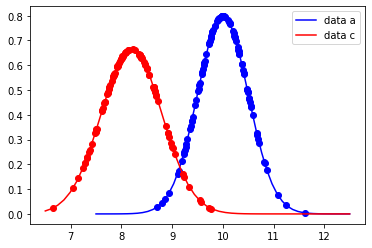

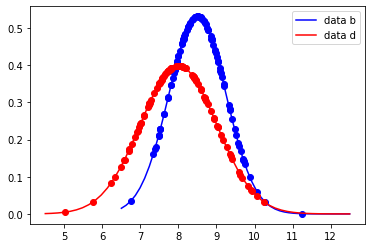

In [118]:
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue',label='data a')
plt.plot(c,data_c,'ro')
plt.plot(c_ajuste,ajuste_gaussiano_c,'red',label='data c')
plt.legend(loc='upper right')
plt.show()

plt.plot(b,data_b,'bo')
plt.plot(b_ajuste,ajuste_gaussiano_b,'blue',label='data b')
plt.plot(d,data_d,'ro')
plt.plot(d_ajuste,ajuste_gaussiano_d,'red',label='data d')
plt.legend(loc='upper right')
plt.show()

In [119]:
mean_a=np.mean(a)
mean_b=np.mean(b)
mean_c=np.mean(c)
mean_d=np.mean(d)

print(mean_a,mean_b,mean_c,mean_d)

9.961902845178265 8.559386828581237 8.171176723628783 7.995753601281637


In [120]:
#Matriz de covarianza
def distribution_a(x):
  return 1/(sigma_a*np.sqrt(2*np.pi))*np.exp(-(x-mu_a)**2/(2*sigma_a**2))
def distribution_b(x):
  return 1/(sigma_b*np.sqrt(2*np.pi))*np.exp(-(x-mu_b)**2/(2*sigma_b**2))
def distribution_c(x):
  return 1/(sigma_c*np.sqrt(2*np.pi))*np.exp(-(x-mu_c)**2/(2*sigma_c**2))
def distribution_d(x):
  return 1/(sigma_d*np.sqrt(2*np.pi))*np.exp(-(x-mu_d)**2/(2*sigma_d**2))

E_ab=np.zeros((2,2))

for i in np.arange(0,a.size):
  E_ab[0,0]=E_ab[0,0]+(a[i]-mean_a)**2  #Componente xx de la matriz de covarianza
  E_ab[0,1]=E_ab[0,1]+(a[i]-mean_a)*(b[i]-mean_b)   #Componente xy de la matriz de covarianza
  E_ab[(1,0)]=E_ab[(1,0)]+(b[i]-mean_b)*(a[i]-mean_a)   #Componente yx de la matriz de covarianza
  E_ab[(1,1)]=E_ab[(1,1)]+(b[i]-mean_b)**2  #Componente yy de la matriz de covarianza

E_ab=E_ab/a.size

print(E_ab)

[[0.29665575 0.03122308]
 [0.03122308 0.54582668]]


In [141]:
#print(a)
a=a.reshape(-1,1)
b=b.reshape(-1,1)


x=np.empty([a.size,2])
y=np.empty((a.size,2))
print(x)
print(a[5])
for i in np.arange(0,a.size):
  x[i]=[a[i], b[i]]
  y[i]=[c[i], d[i]]

#x=pd.DataFrame(data=x)
#y=pd.DataFrame(data=y)
print(x)

x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.4,random_state=1)

#print(x_train)
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

[[4.25262617e-316 5.09227532e-317]
 [8.09773594e-321             nan]
 [9.33934626e+000 0.00000000e+000]
 [1.61410559e+132 3.13435284e+233]
 [7.28079528e+223 4.97164617e-091]
 [1.31307088e-071 2.95154176e-075]
 [2.45579835e+198 9.89803615e+164]
 [1.56791286e+218 2.12040317e+257]
 [6.60925411e-062 1.42137841e-076]
 [1.76540643e+137 1.43573466e-023]
 [6.01347002e-154 9.89803615e+164]
 [1.42137836e-076 8.82141826e+199]
 [9.89803615e+164 9.16281387e-072]
 [5.92942534e-114 9.45956265e-076]
 [1.61410559e+132 9.16281387e-072]
 [1.42137876e-076 1.11416848e+218]
 [1.61410559e+132 9.89803615e+164]
 [1.55736886e+136 9.02193423e+217]
 [9.45956265e-076 2.95160759e-075]
 [2.13412571e+257 6.60925411e-062]
 [9.16281386e-072 1.42137876e-076]
 [1.11416848e+218 9.45956265e-076]
 [1.61410559e+132 2.95164085e-075]
 [2.13412571e+257 1.69724950e+137]
 [1.61410559e+132 6.01390857e-154]
 [1.42137844e-076 2.11161419e+257]
 [6.60925411e-062 2.95165188e-075]
 [5.96971510e+135 9.02193423e+217]
 [1.61410559e+132 9.

ValueError: ignored

In [131]:
'''
x=np.concatenate((a,b))
y=np.concatenate((c,d))
print(x)
'''
x=[]*2
#x=np.arange(200).reshape((a.size, 2))
y=[]*2
for i in np.arange(0,a.size):
  x.append([a[i],b[i]])

print(x)

f=[]
g=[]
for i in np.arange(0,a.size):
  f[i]=x[i,0],x[i,1]
  g[i]=y[i,0],y[i,1]


#x=np.vstack((a, b))
#x=np.vstack((c, d))
#print(x)
print('')
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(f,g, test_size=0.4,random_state=1)

#print(x_train)

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

[[array([8.86958822]), array([8.13103509])], [array([9.79334335]), array([8.87879479])], [array([10.04599575]), array([7.84958115])], [array([9.976364]), array([7.39964035])], [array([9.45338649]), array([9.13986396])], [array([9.67657068]), array([7.9950737])], [array([8.70206023]), array([7.9573922])], [array([10.40051789]), array([7.62708104])], [array([9.93454107]), array([8.51683294])], [array([9.72799189]), array([9.74099598])], [array([9.96094904]), array([8.24319991])], [array([9.77065728]), array([8.51499892])], [array([9.26396099]), array([8.35684644])], [array([9.5356644]), array([8.84715659])], [array([9.89425839]), array([8.25099152])], [array([9.98263524]), array([8.86790216])], [array([10.01926704]), array([9.71576849])], [array([10.31276726]), array([8.0307211])], [array([9.99169351]), array([8.6304267])], [array([9.18963684]), array([8.56697987])], [array([9.83793221]), array([8.71509665])], [array([9.24986566]), array([7.99536137])], [array([10.82195495]), array([8.17

TypeError: ignored

In [81]:

'''
t=[]*a.size
r=[]*a.size
'''
t=[]*a.size

for i in np.arange(0,a.size):
  t[i]=[a[i],b[i]]
  r[i]=c[i],d[i]


#t=np.stack((a, b), axis=1)
#r=np.stack((c, d), axis=1)


IndexError: ignored

In [ ]:
intervalo_umbrales_x=int((np.amax(c)-np.amin(a))*10+1)
vector_umbrales_x=np.linspace(np.amin(a),np.amax(c),num=intervalo_umbrales_x)

intervalo_umbrales_y=int((np.amax(b)-np.amin(b))*10+1)
vector_umbrales_y=np.linspace(np.amin(b),np.amax(b),num=intervalo_umbrales_y)

print(vector_umbrales_x)
print(vector_umbrales_y)

sensibilidad=np.zeros((vector_umbrales_x.size,vector_umbrales_y.size))
presicion=np.zeros((vector_umbrales_x.size,vector_umbrales_y.size))
exactitud=np.zeros((vector_umbrales_x.size,vector_umbrales_y.size))
fall_out=np.zeros((vector_umbrales_x.size,vector_umbrales_y.size))

i=1
print(vector_umbrales_x.size)
print(vector_umbrales_y.size)

[8.90574578 9.00687596 9.10800614 9.20913632 9.31026651 9.41139669
 9.51252687 9.61365705 9.71478723]
[ 6.73717643  6.83845618  6.93973593  7.04101568  7.14229543  7.24357519
  7.34485494  7.44613469  7.54741444  7.64869419  7.74997394  7.85125369
  7.95253344  8.05381319  8.15509294  8.2563727   8.35765245  8.4589322
  8.56021195  8.6614917   8.76277145  8.8640512   8.96533095  9.0666107
  9.16789045  9.2691702   9.37044996  9.47172971  9.57300946  9.67428921
  9.77556896  9.87684871  9.97812846 10.07940821 10.18068796 10.28196771
 10.38324746 10.48452722 10.58580697 10.68708672 10.78836647 10.88964622
 10.99092597]
9
43


El conjunto A y B lo tomo como verdadero, y el conjunto C y D los tomo como falsos

In [ ]:
for i in np.arange(1,vector_umbrales_x.size):
  for j in np.arange(1,vector_umbrales_y.size):
    umbral_x=vector_umbrales_x[i]
    umbral_y=vector_umbrales_y[j]
    tp_count=0    #contador verdaderos positivos
    tn_count=0    #contador verdaderos negativos
    fp_count=0    #contador falsos positivos  
    fn_count=0    #contador falsos negativos
    for n in np.arange(0,a.size):
      for m in np.arange(0,b.size):
        if (a[n]>umbral_x) and (b[m]>umbral_y):
          tp_count=tp_count+1
        elif (a[n]<umbral_x) or (b[m]<umbral_y):
          fp_count=fp_count+1

    for n in np.arange(0,c.size):
      for m in np.arange(0,d.size):
        if (c[n]<umbral_x) and (d[m]<umbral_y):
          tn_count=tn_count+1
        elif (c[n]>umbral_x) or (d[m]>umbral_y):
          fn_count=fn_count+1

    #True Positive Rate
    sensibilidad[i,j]=tp_count/(tp_count+fn_count)

    #Positive Predicted Value
    presicion[i,j]=tp_count/(tp_count+fp_count)

    #Accuracy
    exactitud[i,j]=(tp_count+tn_count)/(tp_count+tn_count+fp_count+fn_count)

    #False Positive Rate
    fall_out[i,j]=fp_count/(fp_count+tn_count)

print(sensibilidad)
print(presicion)      

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         0.53091824 0.52838908 0.52828721 0.53326602 0.54091271
  0.54621458 0.54629738 0.5383286  0.55299001 0.56884449 0.57293987
  0.58375197 0.58624867 0.58578352 0.57686402 0.57940695 0.53824645
  0.53340448 0.51653091 0.48385375 0.48106592 0.46445498 0.48877805
  0.48578982 0.48965025 0.49418154 0.46068376 0.39959225 0.32179104
  0.21181556 0.18889746 0.08521739 0.08844765 0.08844765 0.04818092
  0.        ]
 [1.         0.5324041  0.52987586 0.52987737 0.53506698 0.54304484
  0.54869941 0.54890631 0.54133565 0.55700007 0.57384081 0.57849613
  0.59010447 0.59352959 0.59413403 0.58586034 0.58970561 0.54876807
